In [1]:
from softmax_neural_network import *
import matplotlib.pyplot as plt
import tensorflow as tf
import time

This notebook tests different modifications to a softmax output neural network 

In [2]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.mnist.load_data()

4


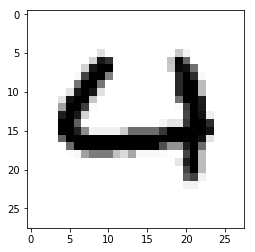

In [3]:
%matplotlib inline
image_index = 60# You may select anything up to 60,000
print(y_train_orig[image_index]) 
plt.imshow(x_train_orig[image_index], cmap='Greys')

In [4]:
#Basic setup
def one_hotorize(x, num_labels):
    #x must be of shape (1,m)
    m = x.shape[1]
    columns = np.arange(m)
    one_indexes = x
    one_hot = np.zeros((num_labels, m))
    one_hot[one_indexes, columns] = 1
    return one_hot
    
num_labels = 10
print("Number of labels = " + str(num_labels))

#Reshaping the y arrays, to be an example each column and one hot vetors
y_train_one = y_train_orig.reshape(y_train_orig.shape[0],1).T
y_test_one = y_test_orig.reshape(y_test_orig.shape[0],1).T

y_train = one_hotorize(y_train_one, num_labels)
y_test = one_hotorize(y_test_one, num_labels)

y_train = y_train.astype('float')
y_test = y_test.astype('float')

print("y_train shape = " + str(y_train.shape))
print("y_test shape = " + str(y_test.shape))

print("one_hot = " + str(y_train[:,0]) + " original label = " + str(y_train_orig[0]))
print("one_hot = " + str(y_train[:,555]) + " original label = " + str(y_train_orig[555]))

#Reshaping the x tensors to a matrix of the examples as each column
x_train = x_train_orig.reshape(x_train_orig.shape[0],x_train_orig.shape[1] * x_train_orig.shape[2]) .T
x_test = x_test_orig.reshape(x_test_orig.shape[0],x_test_orig.shape[1] * x_test_orig.shape[2]) .T

x_train = x_train.astype('float')
x_test = x_test.astype('float')

#Normalizing
x_train /= 255
x_test /= 255

print("x_train shape = " + str(x_train.shape))
print("x_test shape = " + str(x_test.shape))


Number of labels = 10
y_train shape = (10, 60000)
y_test shape = (10, 10000)
one_hot = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] original label = 5
one_hot = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] original label = 2
x_train shape = (784, 60000)
x_test shape = (784, 10000)


In [5]:
def compute_accuracy(predictions, Y):
    m = Y.shape[1]
    mistakes = np.sum(np.abs(predictions - Y)) / 2
    return (m - mistakes) / m

### One layer network

In [6]:
#Single Layer
n_x = x_train.shape[0]
layers = [n_x, num_labels]
num_hidden_layers = len(layers) - 1

In [7]:
start = time.time()
parameters, costs = model_SNN(x_train, y_train, layers, learning_rate = 0.5, num_iterations = 1000, print_cost = True, print_every = 100, initialization = "rand", loaded_parameters = {})
end = time.time()
print(end - start)

Cost in iteration 0 is = 2.5881537644539843
Cost in iteration 100 is = 0.3902811600893581
Cost in iteration 200 is = 0.3450525490045829
Cost in iteration 300 is = 0.3251222218593712
Cost in iteration 400 is = 0.31317090384114943
Cost in iteration 500 is = 0.30494893735382084
Cost in iteration 600 is = 0.29882514609703126
Cost in iteration 700 is = 0.29401964838669775
Cost in iteration 800 is = 0.2901063748807117
Cost in iteration 900 is = 0.2868304685444747
54.80318093299866


In [8]:
predictions = predict_SNN(x_test, parameters, num_hidden_layers)

In [9]:
accuracy = compute_accuracy(predictions, y_test)
print(accuracy)

0.9217


In [10]:
example = x_train[:, 60].reshape(784, 1) # It is the digit 4
prediction_ex = predict_SNN(example, parameters, num_hidden_layers)
prediction_ex

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Two Layer network

In [77]:
n_x = x_train.shape[0]
layers = [n_x, 10, num_labels]
num_hidden_layers = len(layers) - 1
parameters, costs = model_SNN(x_train, y_train, layers, learning_rate = 0.5, num_iterations = 1000, print_cost = True, print_every = 100, initialization = "rand", loaded_parameters = {})


Cost in iteration 0 is = 2.628091790875612
Cost in iteration 100 is = 0.5506286840081004
Cost in iteration 200 is = 0.41344062028613615
Cost in iteration 300 is = 0.39645394652606764
Cost in iteration 400 is = 0.36288063245494795
Cost in iteration 500 is = 0.3365463970927597
Cost in iteration 600 is = 0.32801114667833225
Cost in iteration 700 is = 0.32101545844571266
Cost in iteration 800 is = 0.30290485888390783
Cost in iteration 900 is = 0.29391283713113336


In [78]:
predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print(accuracy)

0.9124


### Using mini batch

In [13]:
#Single Layer
n_x = x_train.shape[0]
layers = [n_x, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_SNN(x_train, y_train, layers, learning_rate = 0.5, mini_batch_size = 512, num_iterations = 1000, print_cost = True, print_every = 100, initialization = "rand", loaded_parameters = {})
end = time.time()
print(end - start)

Cost in iteration 0 is = 0.4265935887863252
Cost in iteration 100 is = 0.15137063555854466
Cost in iteration 200 is = 0.1087581215290541
Cost in iteration 300 is = 0.08637122106257683
Cost in iteration 400 is = 0.07487199388815417
Cost in iteration 500 is = 0.06889265314537459
Cost in iteration 600 is = 0.06538198017580027
Cost in iteration 700 is = 0.06304507026853262
Cost in iteration 800 is = 0.061338205385063994
Cost in iteration 900 is = 0.060008286936585574
284.6042697429657


In [15]:
predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print(accuracy)

0.9251


In [13]:
#Single Layer
n_x = x_train.shape[0]
layers = [n_x, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_SNN(x_train, y_train, layers, learning_rate = 0.5, mini_batch_size = 64, num_iterations = 500, print_cost = True, print_every = 100, initialization = "rand", loaded_parameters = {})
end = time.time()
print(end - start)

Cost in iteration 0 is = 0.12675401522909735
Cost in iteration 100 is = 0.05119914415662789
Cost in iteration 200 is = 0.04854721825254969
Cost in iteration 300 is = 0.04656895844891905
Cost in iteration 400 is = 0.044841693373865156
42.26091718673706


In [12]:
predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print(accuracy)

0.9149


In [15]:
#Single Layer 1024 = mini batch
n_x = x_train.shape[0]
layers = [n_x, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_SNN(x_train, y_train, layers, learning_rate = 0.5, mini_batch_size = 1024, num_iterations = 500, print_cost = True, print_every = 100, initialization = "rand", loaded_parameters = {})
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.3464976565029541
Cost in iteration 100 is = 0.22983092752853196
Cost in iteration 200 is = 0.21972826332629627
Cost in iteration 300 is = 0.2135202858545402
Cost in iteration 400 is = 0.2089848840855029
Time = 22.64107084274292
accuracy = 0.9257


In [16]:
#Single Layer 2048 = mini batch
n_x = x_train.shape[0]
layers = [n_x, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_SNN(x_train, y_train, layers, learning_rate = 0.5, mini_batch_size = 2048, num_iterations = 500, print_cost = True, print_every = 100, initialization = "rand", loaded_parameters = {})
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.4482235220891359
Cost in iteration 100 is = 0.21050854704216068
Cost in iteration 200 is = 0.19278666731673502
Cost in iteration 300 is = 0.18184837549023186
Cost in iteration 400 is = 0.17383526755129858
Time = 22.68686294555664
accuracy = 0.9247


In [17]:
#Single Layer 1500 = mini batch
n_x = x_train.shape[0]
layers = [n_x, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_SNN(x_train, y_train, layers, learning_rate = 0.5, mini_batch_size = 1500, num_iterations = 500, print_cost = True, print_every = 100, initialization = "rand", loaded_parameters = {})
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.35914089442030445
Cost in iteration 100 is = 0.18388237300726626
Cost in iteration 200 is = 0.17496374361935993
Cost in iteration 300 is = 0.17067239965999598
Cost in iteration 400 is = 0.16806163085336587
Time = 23.112200021743774
accuracy = 0.9262


Mini batch = 1024 seems good

The next networks were trained until the test accuracy started to decrease.

In [52]:
#Single Layer 1024 = mini batch
n_x = x_train.shape[0]
layers = [n_x, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_SNN(x_train, y_train, layers, learning_rate = 0.5, mini_batch_size = 1024, num_iterations = 500, print_cost = True, print_every = 100, initialization = "he", loaded_parameters = {})
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.34618716857415444
Cost in iteration 100 is = 0.22827561448148764
Cost in iteration 200 is = 0.2190930924100927
Cost in iteration 300 is = 0.21317666635638363
Cost in iteration 400 is = 0.20875294225514346
Time = 24.123496055603027
accuracy = 0.9261


A 1 layer Neural Network with layers = [n_x, num_labels], was able to achieve 0.9259 accuracy after 500 epochs (iterations) using rand initialization, and using he initialization achieved 0.926

In [38]:
#Dual Layer 1024 = mini batch
n_x = x_train.shape[0]
layers = [n_x, 300, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_SNN(x_train, y_train, layers, learning_rate = 0.5, mini_batch_size = 1024, num_iterations = 50, print_cost = True, print_every = 5, initialization = "load", loaded_parameters = parameters)
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.0024559041803709322
Cost in iteration 5 is = 0.002327650411082103
Cost in iteration 10 is = 0.002221560871610168
Cost in iteration 15 is = 0.0021163175111771596
Cost in iteration 20 is = 0.0020169895723625183
Cost in iteration 25 is = 0.001925797658581512
Cost in iteration 30 is = 0.0018436633444008092
Cost in iteration 35 is = 0.0017722444914671717
Cost in iteration 40 is = 0.0016985298402438908
Cost in iteration 45 is = 0.0016324635984340213
Time = 28.535768032073975
accuracy = 0.9785


A 2 layer Neural Network with layers = [n_x, 300, num_labels], was able to achieve 0.9785 accuracy after a few hundred epochs (iterations)

In [44]:
#Dual Layer 1024 = mini batch
n_x = x_train.shape[0]
layers = [n_x, 500, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_SNN(x_train, y_train, layers, learning_rate = 0.5, mini_batch_size = 1024, num_iterations = 5, print_cost = True, print_every = 5, initialization = "load", loaded_parameters = parameters)
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.0006973001923751357
Time = 4.777189016342163
accuracy = 0.9802


A 2 layer Neural Network with layers = [n_x, 500, num_labels], was able to achieve 0.9802 accuracy after 200 epochs (iterations)

In [58]:
#Dual Layer 1024 = mini batch
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_SNN(x_train, y_train, layers, learning_rate = 0.5, mini_batch_size = 1024, num_iterations = 50, print_cost = True, print_every = 5, initialization = "load", loaded_parameters = parameters)
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.0006960520135410659
Cost in iteration 5 is = 0.0006811710324105103
Cost in iteration 10 is = 0.0006664663845024495
Cost in iteration 15 is = 0.0006513146708574599
Cost in iteration 20 is = 0.0006374387170646006
Cost in iteration 25 is = 0.0006266536982122721
Cost in iteration 30 is = 0.0006134631832131514
Cost in iteration 35 is = 0.000601018768349571
Cost in iteration 40 is = 0.0005898896534788594
Cost in iteration 45 is = 0.0005774105369109285
Time = 93.65585780143738
accuracy = 0.9803


A 2 layer Neural Network with layers = [n_x, 800, num_labels], was able to achieve 0.9803 accuracy after a few hundred epochs (iterations)

In [63]:
#Dual Layer 1024 = mini batch
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_SNN(x_train, y_train, layers, learning_rate = 0.5, mini_batch_size = 512, num_iterations = 50, print_cost = True, print_every = 5, initialization = "rand", loaded_parameters = parameters)
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.3518723915010096
Cost in iteration 5 is = 0.14967478196135134
Cost in iteration 10 is = 0.0969908274517386
Cost in iteration 15 is = 0.05044248457393221
Cost in iteration 20 is = 0.024001480383161588
Cost in iteration 25 is = 0.012406956927938606
Cost in iteration 30 is = 0.00862411405402056
Cost in iteration 35 is = 0.006624224913766416
Cost in iteration 40 is = 0.005158280211988516
Cost in iteration 45 is = 0.003994065982074608
Time = 82.9796929359436
accuracy = 0.9807


A 2 layer Neural Network with layers = [n_x, 800, num_labels], was able to achieve 0.9807 accuracy after 50 epochs (iterations) using mini batch = 512

## Dropout

In [7]:
#Dual Layer 1024 mini batch with dropout
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_dropout_SNN(x_train, y_train, layers, learning_rate = 0.5, keep_prob = 0.8, mini_batch_size = 512, num_iterations = 50, print_cost = True, print_every = 5, initialization = "rand", loaded_parameters = {})
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.47641816962281497
Cost in iteration 5 is = 0.16022762118908204
Cost in iteration 10 is = 0.06947342615865355
Cost in iteration 15 is = 0.04244075903157903
Cost in iteration 20 is = 0.029797895433713837
Cost in iteration 25 is = 0.02170085406965891
Cost in iteration 30 is = 0.022579875524401577
Cost in iteration 35 is = 0.017345630075120372
Cost in iteration 40 is = 0.0055066382953978385
Cost in iteration 45 is = 0.010772511650369312
Time = 114.35296988487244
accuracy = 0.9809


A 2 layer Neural Network with layers = [n_x, 800, num_labels], was able to achieve 0.9809 accuracy after 50 epochs (iterations) using mini batch = 512 and dropout 0.8

In [14]:
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_dropout_SNN(x_train, y_train, layers, learning_rate = 0.5, keep_prob = 0.8, mini_batch_size = 512, num_iterations = 10, print_cost = True, print_every = 5, initialization = "load", loaded_parameters = parameters)
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.01473059742795696
Cost in iteration 5 is = 0.05095849328932212
Time = 26.765535831451416
accuracy = 0.9818


A 2 layer Neural Network with layers = [n_x, 800, num_labels], was able to achieve 0.9818 accuracy after 110 epochs (iterations) using mini batch = 512 and dropout 0.8

In [17]:
#Dual Layer 1024 mini batch with dropout
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_dropout_SNN(x_train, y_train, layers, learning_rate = 0.5, keep_prob = 0.6, mini_batch_size = 512, num_iterations = 100, print_cost = True, print_every = 5, initialization = "rand", loaded_parameters = {})
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.40565670107350993
Cost in iteration 5 is = 0.07023609734452943
Cost in iteration 10 is = 0.04511566280233554
Cost in iteration 15 is = 0.05147137013551336
Cost in iteration 20 is = 0.028191632963289564
Cost in iteration 25 is = 0.03031050630310293
Cost in iteration 30 is = 0.01997669760075205
Cost in iteration 35 is = 0.018695748073068955
Cost in iteration 40 is = 0.024165640363559966
Cost in iteration 45 is = 0.011461320105440688
Cost in iteration 50 is = 0.01310484090349318
Cost in iteration 55 is = 0.006572358406057533
Cost in iteration 60 is = 0.0079356305687848
Cost in iteration 65 is = 0.006544808370461803
Cost in iteration 70 is = 0.013514864516107838
Cost in iteration 75 is = 0.013260105149935869
Cost in iteration 80 is = 0.0038761629114735523
Cost in iteration 85 is = 0.009822074689816615
Cost in iteration 90 is = 0.0026045041487907255
Cost in iteration 95 is = 0.011659308447503063
Time = 255.30922603607178
accuracy = 0.982


A 2 layer Neural Network with layers = [n_x, 800, num_labels], was able to achieve 0.982 accuracy after 100 epochs (iterations) using mini batch = 512 and dropout 0.6

In [11]:
#Dual Layer 1024 mini batch with dropout
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_mini_batch_dropout_SNN(x_train, y_train, layers, learning_rate = 0.5, keep_prob = 0.6, mini_batch_size = 512, num_iterations = 10, print_cost = True, print_every = 5, initialization = "rand", loaded_parameters = {})
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))

Cost in iteration 0 is = 0.45286853768539964
Cost in iteration 5 is = 0.1524882937977333
Time = 23.698756217956543
accuracy = 0.9671


## Gradient descent with momentum Optimizer

In [8]:
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_dropout_Opt_SNN(x_train, y_train, layers, learning_rate = 0.5,  keep_prob = 0.6, mini_batch_size = 512, beta1 = 0.5, beta2 = 0.999, optimizer = "momentum", num_iterations = 50, print_cost = True, print_every = 5, initialization = "load", loaded_parameters = parameters)
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))


Cost in iteration 0 is = 0.020974475652774795
Cost in iteration 5 is = 0.04041520144941645
Cost in iteration 10 is = 0.02359901082158394
Cost in iteration 15 is = 0.0166110784691672
Cost in iteration 20 is = 0.019332179709220187
Cost in iteration 25 is = 0.015733382553522635
Cost in iteration 30 is = 0.018007833601362006
Cost in iteration 35 is = 0.00624870641068422
Cost in iteration 40 is = 0.004805746947388986
Cost in iteration 45 is = 0.003164289019747002
Time = 139.71671295166016
accuracy = 0.9826


A 2 layer Neural Network with layers = [n_x, 800, num_labels], was able to achieve 0.982 accuracy after 100 epochs (iterations) using mini batch = 512, dropout 0.6 and momentum optimizer with beta1 = 0.5

## RMSprop

In [14]:
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_dropout_Opt_SNN(x_train, y_train, layers, learning_rate = 0.001,  keep_prob = 0.6, mini_batch_size = 512, beta1 = 0.9, beta2 = 0.999, optimizer = "rms", num_iterations = 50, print_cost = True, print_every = 5, initialization = "rand", loaded_parameters = parameters)
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))


Cost in iteration 0 is = 0.36824789459784
Cost in iteration 5 is = 0.07106280356962873
Cost in iteration 10 is = 0.02796217754531612
Cost in iteration 15 is = 0.014983640854962213
Cost in iteration 20 is = 0.009648336552688718
Cost in iteration 25 is = 0.011104915119257498
Cost in iteration 30 is = 0.005209602599766469
Cost in iteration 35 is = 0.003036335817726907
Cost in iteration 40 is = 0.004075799521866712
Cost in iteration 45 is = 0.002824858848696939
Time = 201.30750513076782
accuracy = 0.9839


A 2 layer Neural Network with layers = [n_x, 800, num_labels], was able to achieve 0.9839 accuracy after 50 epochs (iterations) using mini batch = 512, dropout 0.6 and RMSprop optimizer with beta2 = 0.999

In [18]:
#Using momentum with the settings used for RMSprop did not work
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_dropout_Opt_SNN(x_train, y_train, layers, learning_rate = 0.001,  keep_prob = 0.6, mini_batch_size = 512, beta1 = 0.9, beta2 = 0.999, optimizer = "momentum", num_iterations = 50, print_cost = True, print_every = 5, initialization = "rand", loaded_parameters = parameters)
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))


Cost in iteration 0 is = 2.30833287355722
Cost in iteration 5 is = 2.251004243926743
Cost in iteration 10 is = 2.1785982182709698
Cost in iteration 15 is = 2.1215236164073503
Cost in iteration 20 is = 2.053370121866539
Cost in iteration 25 is = 1.9121368673090817
Cost in iteration 30 is = 1.7692020389381324
Cost in iteration 35 is = 1.6422429611173552
Cost in iteration 40 is = 1.4623064817899987
Cost in iteration 45 is = 1.3582633170672611
Time = 142.60676622390747
accuracy = 0.7868


## Adam

In [19]:
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_dropout_Opt_SNN(x_train, y_train, layers, learning_rate = 0.001,  keep_prob = 0.6, mini_batch_size = 512, beta1 = 0.9, beta2 = 0.999, optimizer = "adam", num_iterations = 50, print_cost = True, print_every = 5, initialization = "rand", loaded_parameters = parameters)
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))


Cost in iteration 0 is = 0.3969156171352844
Cost in iteration 5 is = 0.06803828671951767
Cost in iteration 10 is = 0.03658513406883895
Cost in iteration 15 is = 0.01607436678969358
Cost in iteration 20 is = 0.009884926497159678
Cost in iteration 25 is = 0.010528394230469681
Cost in iteration 30 is = 0.010396736129129265
Cost in iteration 35 is = 0.014087037637767837
Cost in iteration 40 is = 0.00197996197487642
Cost in iteration 45 is = 0.006230175939473558
Time = 233.18387722969055
accuracy = 0.983


In [25]:
n_x = x_train.shape[0]
layers = [n_x, 800, num_labels]
num_hidden_layers = len(layers) - 1
start = time.time()
parameters, costs = model_dropout_Opt_SNN(x_train, y_train, layers, learning_rate = 0.001,  keep_prob = 0.5, mini_batch_size = 512, beta1 = 0.9, beta2 = 0.999, optimizer = "adam", num_iterations = 50, print_cost = True, print_every = 5, initialization = "rand", loaded_parameters = parameters)
end = time.time()
print("Time = " + str(end - start))

predictions = predict_SNN(x_test, parameters, num_hidden_layers)
accuracy = compute_accuracy(predictions, y_test)
print("accuracy = " + str(accuracy))


Cost in iteration 0 is = 0.4156840448474583
Cost in iteration 5 is = 0.11440776928378012
Cost in iteration 10 is = 0.033221033230067594
Cost in iteration 15 is = 0.018181833428563273
Cost in iteration 20 is = 0.028503591231386436
Cost in iteration 25 is = 0.014750114826010243
Cost in iteration 30 is = 0.008706880838149364
Cost in iteration 35 is = 0.0039456772691254674
Cost in iteration 40 is = 0.002389481239961592
Cost in iteration 45 is = 0.0018534596090154
Time = 219.19909715652466
accuracy = 0.9834


A 2 layer Neural Network with layers = [n_x, 800, num_labels], was able to achieve 0.9834 accuracy after 50 epochs (iterations) using mini batch = 512, dropout 0.5 and Adam optimizer with beta1 = 0.9 and beta2 = 0.999